In [1]:
import matplotlib.pyplot as plt
import numpy as np

file1 = open('IROS2020_Practice_Base.STEP', 'r') 
Linesraw = file1.readlines() 
  
count = 0
#for line in Lines: 
##   print("Line{}: {}".format(count, line.strip())) 
#    count+=1
    
data=Linesraw[14:]
#for line in data: 
#    print(" {}".format(line.strip()))     
    

In [9]:
xlist=[]
ylist=[]
zlist=[]
radiuslist=[]


verbose=False

for line in data: 
    line=line.strip()

for line in data: 
    if line.find('CIRCLE')!=-1:
        #find address of 2nd pound sign, starting at character 2
        secpoundloc=int(line.find('#',2)) 
        seccommaloc=int(line.find(',',secpoundloc))
        lastparenloc=int(line.find(')',seccommaloc))
        
        #get address of corresponding AXIS2_PLACEMENT_3D 
        #print(line[secpoundloc+1:seccommaloc]) 
        axis2address=int(line[secpoundloc+1:seccommaloc])
        radius=float(line[seccommaloc+1:lastparenloc-2])
        
        axis2temp=data[axis2address].strip()
        
        
        secpoundloc2=int(axis2temp.find('#',2)) 
        seccommaloc2=int(axis2temp.find(',',secpoundloc2))

        cartesian_pointaddress=int(axis2temp[secpoundloc2+1:seccommaloc2])
        #print("cartesian_point address=",cartesian_pointaddress)
        cartesian_pointtemp=data[cartesian_pointaddress].strip()
        
        
        firstcommaloc3=int(cartesian_pointtemp.find(','))
        seccommaloc3=int(cartesian_pointtemp.find(',',firstcommaloc3+1))
        thirdcommaloc3=int(cartesian_pointtemp.find(',',seccommaloc3+1))
        parenloc3=int(cartesian_pointtemp.find(')',thirdcommaloc3+1))
        
        #print(firstcommaloc3)
        #print(seccommaloc3)
        #print(thirdcommaloc3)
        #x=cartesian_pointtemp[32:58]
        x=float(cartesian_pointtemp[firstcommaloc3+5:seccommaloc3])
        y=float(cartesian_pointtemp[seccommaloc3+2:thirdcommaloc3])
        z=float(cartesian_pointtemp[thirdcommaloc3+2:parenloc3-1])
        
        if verbose==True:
            print(line.strip())
            print("radius=",radius)
            print(data[axis2address].strip())
            print(cartesian_pointtemp)
            print("x= ",x)
            print("y= ",y)
            print("z= ",z)
            print("       ")
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)
        radiuslist.append(radius)


       

                

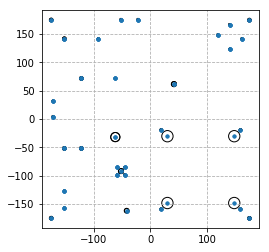

In [67]:
fig, ax = plt.subplots()

ax.set(xlim=(-192, 192), ylim = (-192,192))

plt.plot(xlist, zlist, marker = '.', linestyle = 'None')

         
    
    
for i in range(178):
    if ylist[i]==0:
        circle1 = plt.Circle((xlist[i], zlist[i]), radiuslist[i], fill=False)
        ax.add_artist(circle1)
ax.set_aspect(1)
plt.grid(linestyle='--')    
plt.show()



In [68]:
#for i in range (len(radiuslist)):
#    print(radiuslist[i])

#radiuslist.sort() 
#print(radiuslist)
"""
bolt types:

M4
M6
M8
http://www.tanoi-mfg.co.jp/us/technical/holesize_c/m.html
units in MM according to step file

signficant ranges:
1.6973371528282433 "range A"
1.700000000000007

1.9973371528282102  "range B"
1.997337152828238

1.999999999999974  "range C"
2.0000000000000018


2.3999999999999853  M3  "range D"
2.4000000000000132

3.1750000000000114 "range E"

3.2973371528282334   M4  "range F"
3.299999999999997

4.060000000000008   "range G"

4.497337152828241 "range H"
4.5000000000000036
 
8.099999999999996 "range I"

10.000000000000002 "range J"
10.000000000000009
"""
categories=['A','B','C-M3','D','E-M4','F','G','H','I',]
categorylist=[]
for r in radiuslist:
    if r>=1.6973371528282433 and r<=1.700000000000007:
        categorylist.append(categories[0])
    elif r>=1.9973371528282102 and r<=2.0000000000000018:
        categorylist.append(categories[1])
    elif r>=2.3999999999999853  and r<=2.4000000000000132:
        categorylist.append(categories[2])   #M3 ?             
    elif r==3.1750000000000114:
        categorylist.append(categories[3])                
    elif r>=3.2973371528282334  and r<=3.299999999999997:
        categorylist.append(categories[4])  #M4?      
    elif r==4.060000000000008 :
        categorylist.append(categories[5])
    elif r>=4.497337152828241   and r<=4.5000000000000036:
        categorylist.append(categories[6])                
    elif r==8.099999999999996:
        categorylist.append(categories[7])                
    elif r>=10.000000000000002  and r<=10.000000000000009:
        categorylist.append(categories[0])           

for cat in categories: 
    for c in range(len(xlist)):
        if categorylist[c]==cat and ylist[c]==0:   
            print(f'{categorylist[c]:4}  x= {xlist[c]:20} y= {zlist[c]:20} z= {ylist[c]:25} radius={radiuslist[c]:20}')


A     x=               -45.44 y=   -85.43999999999998 z=                       0.0 radius=  1.6973371528282433
A     x=   148.24999999999994 y=              -148.25 z=                       0.0 radius=  10.000000000000009
A     x=               -58.09 y=   -98.08999999999999 z=                       0.0 radius=  1.6973371528282433
A     x=                30.25 y=               -30.25 z=                       0.0 radius=  10.000000000000002
A     x=  -58.089999999999996 y=   -85.43999999999998 z=                       0.0 radius=  1.6973371528282433
A     x=               -45.44 y=   -98.08999999999999 z=                       0.0 radius=  1.6973371528282433
A     x=                30.25 y=              -148.25 z=                       0.0 radius=  10.000000000000009
A     x=  -58.089999999999996 y=   -85.43999999999998 z=                       0.0 radius=  1.6973371528282433
A     x=  -151.76999999999995 y=  -156.76999999999998 z=                       0.0 radius=  1.6973371528282433
A

In [98]:
xdupe=0
zdupe=0

#check for duplicates           
for cat in categories: 
    
    xduplicatechecktable=[]  
    zduplicatechecktable=[]

    for c in range(len(xlist)):
        #print(categorylist[c])
        #print(cat)
        xdupe=0
        zdupe=0
  
        if categorylist[c]==cat:  
        #if categorylist[c]==cat and ylist[c]==0:#Remove all nonzero z value circles  
        #if categorylist[c]==cat and ylist[c]<0.0017:     
            #print(f'{categorylist[c]:4}  x= {xlist[c]:20} y= {zlist[c]:20} radius={radiuslist[c]:20}')


            for xd in xduplicatechecktable:
                #print("xd=",xd,"xlist[c]=",xlist[c])
                if xlist[c]==xd:
                        xdupe=1
                        #print("X DUPLICATE!")
                        #print(xdupe)
            for zd in xduplicatechecktable:
                if zlist[c]==zd:
                        zdupe=1
                        #print("Y DUPLICATE!")
                        
            #print(f'{categorylist[c]:4} x= {xlist[c]:20} xdupe={xdupe:2} y= {zlist[c]:20} ydupe={zdupe:2} radius={radiuslist[c]:20}')                        

            if xdupe==0 and zdupe==0:
                print(f'{categorylist[c]:4} x= {xlist[c]:20} y= {zlist[c]:20} z= {ylist[c]:25} radius={radiuslist[c]:20}')            
                #print(f'{categorylist[c]:4} x= {xlist[c]:20} xdupe={xdupe:5} y= {zlist[c]:20} ydupe={zdupe:5} radius={radiuslist[c]:20}')            

            xduplicatechecktable.append(xlist[c])
            zduplicatechecktable.append(zlist[c])
    #print(xduplicatechecktable)
    #print(zduplicatechecktable)  
            
            
            #break
    
        
    
#plt.plot(radiuslist)
#plt.show()
#print(radiuslist)

A    x=               -45.44 y=   -85.43999999999998 z=                       0.0 radius=  1.6973371528282433
A    x=  -151.76999999999995 y=  -156.76999999999998 z=     0.0015999999999991715 radius=   1.700000000000007
A    x=   148.24999999999994 y=              -148.25 z=                       0.0 radius=  10.000000000000009
A    x=   -151.7699999999999 y=              -126.77 z=         8.991599999999998 radius=   1.700000000000007
A    x=               -58.09 y=   -98.08999999999999 z=                       0.0 radius=  1.6973371528282433
A    x=  -58.089999999999996 y=   -85.43999999999998 z=         8.991599999999998 radius=   1.700000000000007
A    x=                30.25 y=               -30.25 z=                       0.0 radius=  10.000000000000002
A    x=   148.24999999999997 y=               -30.25 z=         8.991599999999998 radius=  10.000000000000002
B    x=   140.22934077146195 y=               166.77 z=     0.0016000000000009063 radius=   1.999999999999974
B    x=  -